# Perceptron: representation, classification and training

<p>This notebook demostrates how to represent a Perceptron neuron to use it to classify and learn the dataset

<small>Author: Fernando Carlos López Hernández</small>

## Representing of the Perceptron
A Perceptron can be initially represented using a vector of input features, a vector of weights, and a separate bias term.

In [13]:
def step(v):
    return 1.0 if v >= 0.0 else 0

x = [1.8, 2.0, 1.7]
w = [-1.0, 1.0, -2.0]
b = 2.0
v = w[0]*x[0] + w[1]*x[1] +w[2]*x[2] + b
-1.2
y = step(v)
0.0;

However we can make a more compact representation using an extended vector including the bias as the first element of the weight vector:

In [14]:
import numpy as np

x = np.array([1.0, 1.8, 2.0, 1.7])
w = np.array([2.0, -1.0, 1.0, -2.0])
v = np.dot(w,x)
-1.2
y = step(v)
0.0;

# Generating a synthetic dataset for binary classification

First we generate a 2D artificial dataset wih 100 samples, 2 features/dimensions per sample, and binary classification result

In [15]:
from sklearn.datasets import make_classification

np.random.seed(109)
X, Y = make_classification(n_features=2, n_classes=2, n_samples=100, n_redundant=0, n_clusters_per_class=1)

We add the bias input x0 = 1.0 to each sample:

In [16]:
X = np.hstack([np.ones((100,1)),X]) # The x_0[i] is always 1.0

# Classification with untrained Perceptron

We now use an untrained Perceptron to classify the samples X using randomly initialized weights w.

In [17]:
# Classification function
def perceptron_classify(X, w):
    Y = []
    for x in X:
        Y.append(step(np.dot(w,x)))
    return Y

m = 2 # Number of real features
# Initialize random weights (including bias)
w = np.random.normal(size = m+1)

# Perform classification with the untrained Perceptron
Y_est = perceptron_classify(X, w)

We visualize the dataset and the predictions made by the untrained Perceptron.

Note that the accuracy is low as only about 50% of the samples are correctly classified.

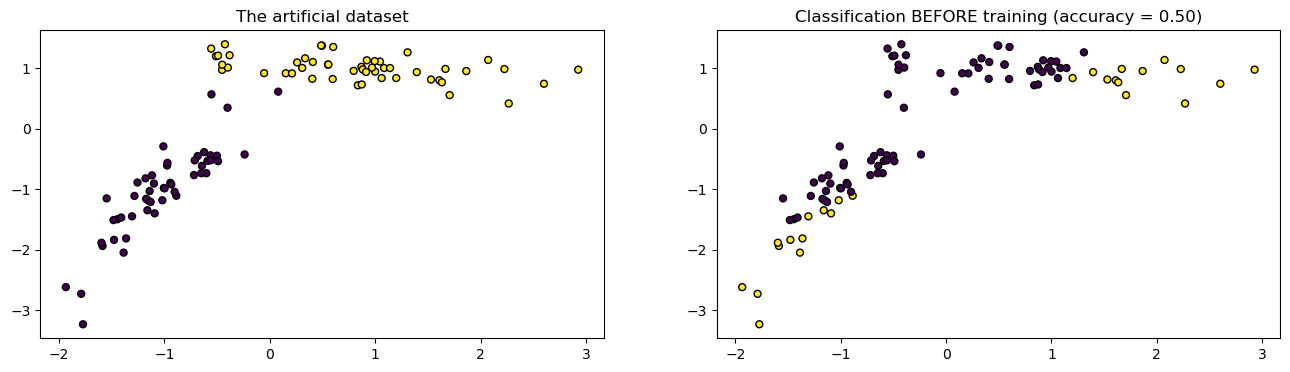

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("The artificial dataset")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y, s=25, edgecolor="k")

plt.subplot(122)
accuracy = np.sum(Y == Y_est) / len(Y)
plt.title(f"Classification BEFORE training (accuracy = {accuracy:.2f})")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y_est, s=25, edgecolor="k");

## Training the Perceptron with the extended learning rule

We now train the Perceptron to correctly classify the (X,y) dataset using the Perceptron learning rule

In [19]:
learning_rate = 0.1
max_epochs = 100

for epoch in range(max_epochs):
    for i,x in enumerate(X):
        y_est = step(np.dot(w,x))
        e = Y[i] - y_est
        w = w + learning_rate * e * x # Vectorized update using extended input

# Classification after training

We re-evaluate dataset classification using the trained Perceptron

In [20]:
Y_est = perceptron_classify(X, w)

And visualize the final classification.

Note that after training, the Perceptron has correctly classified 100% of the samples.

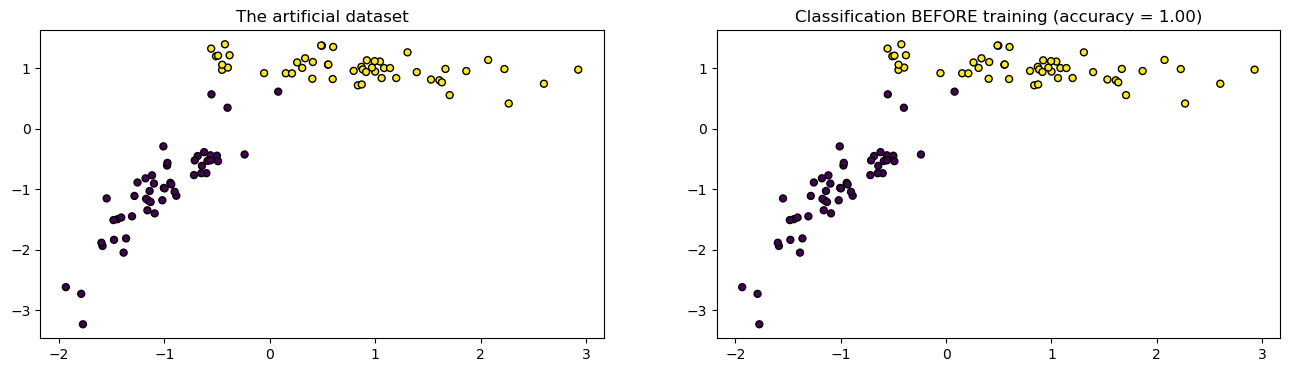

In [21]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("The artificial dataset")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y, s=25, edgecolor="k")

plt.subplot(122)
accuracy = np.sum(Y == Y_est) / len(Y)
plt.title(f"Classification BEFORE training (accuracy = {accuracy:.2f})")
plt.scatter(X[:, 1], X[:, 2], marker="o", c=Y_est, s=25, edgecolor="k");